In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def Gaussian(x, mean, std):
    return np.exp(-0.5*np.square((x-mean)/std))

def u(x, i1, i2, p):
    x = np.array(x)  # Ensure x is a numpy array
    m = np.max(x, axis=0)
    n = np.min(x, axis=0)
    
    if i2 == 1:
        a = n[i1]
        b = n[i1]
        c = (n[i1] + m[i1]) / 2
    elif i2 == 2:
        a = n[i1]
        b = (n[i1] + m[i1]) / 2
        c = m[i1]
    else:
        a = (n[i1] + m[i1]) / 2
        b = m[i1]
        c = m[i1]

    if x[p, i1] == b:
        y = 1
    elif x[p, i1] < a:
        y = 0
    elif x[p, i1] > c:
        y = 0
    elif x[p, i1] < b:
        y = (x[p, i1] - a) / (b - a)
    elif x[p, i1] > b:
        y = (c - x[p, i1]) / (c - b)
    
    return y

In [156]:
def w(x, z, p):
    a = z
    b, c, d = 1, 1, 1

    while a > 3:
        # print(a, b, c, d)
        a -= 3
        b += 1
        if b == 4:
            b -= 3
            c += 1
        if c == 4:
            c -= 3
            d += 1

    y = u(x, 0, a, p) * u(x, 1, b, p) * u(x, 2, c, p) * u(x, 3, d, p)
    # print("final: ", a, b, c, d, y)
    
    
    return y

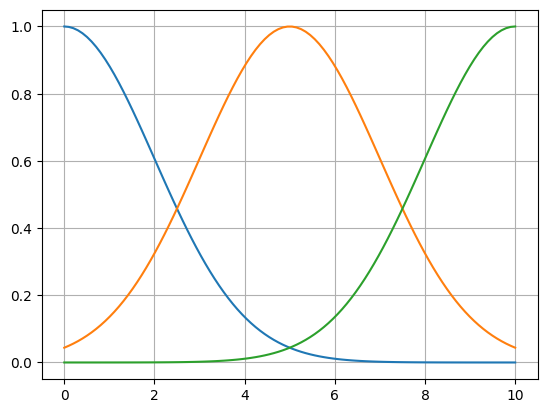

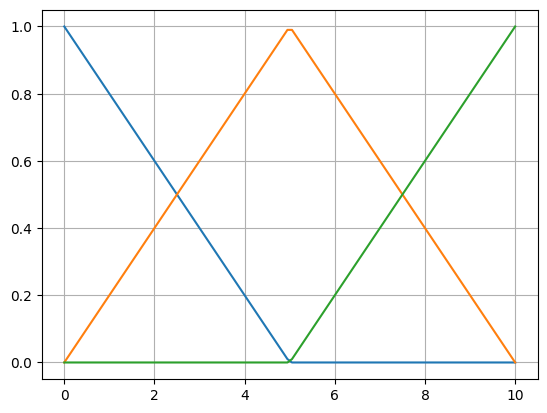

In [181]:
u(np.linspace(0, 5, 100).reshape(-1, 1), 0, 1, 25)

# Sample data
x = np.linspace(0, 10, 100).reshape(-1, 1)

# print(w(np.random.rand(78, 4) * 10, 20, 50))

for i in range(82): w(np.random.rand(78, 4) * 10, i, 0)

y1 = [u(x, 0, 1, v) for v in range(100)]
y2 = [u(x, 0, 2, v) for v in range(100)]
y3 = [u(x, 0, 3, v) for v in range(100)]

plt.plot(x, Gaussian(x, 0, 2), label='MF1')
plt.plot(x, Gaussian(x, 5, 2), label='MF2')
plt.plot(x, Gaussian(x, 10, 2), label='MF3')
plt.grid()
plt.show()

plt.plot(x, y1, label='MF3')
plt.plot(x, y2, label='MF3')
plt.plot(x, y3, label='MF3')
plt.grid()
plt.show()

In [148]:
def b(x, p):
    l = len(x)
    y = np.zeros(l)
    i = 0  # Python uses 0-based indexing
    sum_val = 0

    for i in range(l):
        sum_val += w(x, i, p)
    
    for i in range(l):
        y[i] = w(x, i, p) / sum_val
    
    return y

In [7]:
def wsum(x, p):
    sum_val = 0
    l = len(x)

    for i in range(l):
        sum_val += w(x, i, p)

    return sum_val

In [174]:
def rlls(x, y):
    theta = np.zeros(77)
    error = np.zeros(77)
    prediction = np.zeros(77)
    P = 1000 * np.eye(77)

    for i in range(77):
        a = b(x, i)
        # print("a matrix is: ", a.shape, np.transpose(a), sep='\n')
        # break
        at = np.transpose(a)  # Transpose of a
        error[i] = y[i] - np.dot(at, theta)
        k = np.dot(P, a) / (np.dot(np.dot(at, P), a) + 1)
        P = P * (1 - np.dot(k, at))
        theta = theta + k * error[i]
        prediction[i] = np.dot(at, theta)

    print("theta: ", theta)
    return prediction

In [177]:
data = pd.read_csv('data/rls_tmp.csv')

xs = data[['x1', 'x2', 'x3', 'x4']].to_numpy()[:77]
ys = data['y'].to_numpy()[:77]
data.head()

,x1,x2,x3,x4,y
0,13.74,0.02,13.68,0.04,15.80
1,15.80,0.00,15.78,0.02,14.98
2,14.98,0.70,14.23,0.05,17.99
3,17.99,0.00,17.95,0.04,15.55
4,15.55,0.29,15.22,0.04,16.72


In [178]:
y_pred = rlls(xs, ys)
# w(xs, 1, 1)

theta:  [0.00000000e+00 2.90492469e+01 1.62551701e+01 0.00000000e+00
 1.11980535e+01 3.59556660e+00 0.00000000e+00 1.83016021e+00
 5.58416746e-01 0.00000000e+00 1.63316195e+01 1.22126941e+01
 9.23865846e-02 3.44529949e+00 1.40972671e+00 1.27429772e-02
 5.12845808e-01 1.63678558e-01 0.00000000e+00 0.00000000e+00
 9.32941079e-02 1.20599700e-02 0.00000000e+00 1.28681528e-02
 1.66344414e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.71828320e+00 4.98667394e+00 0.00000000e+00 1.42505597e+00
 6.66185442e-01 0.00000000e+00 3.62058331e-01 1.15411877e-01
 0.00000000e+00 4.98849099e+00 1.74990259e+01 2.55063736e+00
 6.45422628e-01 1.31912757e+00 6.74628204e-02 1.05704019e-01
 3.54117358e-02 0.00000000e+00 0.00000000e+00 2.56482315e+00
 1.10964177e+00 0.00000000e+00 6.81255149e-02 8.80646900e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 

In [165]:
len(y_pred)

77

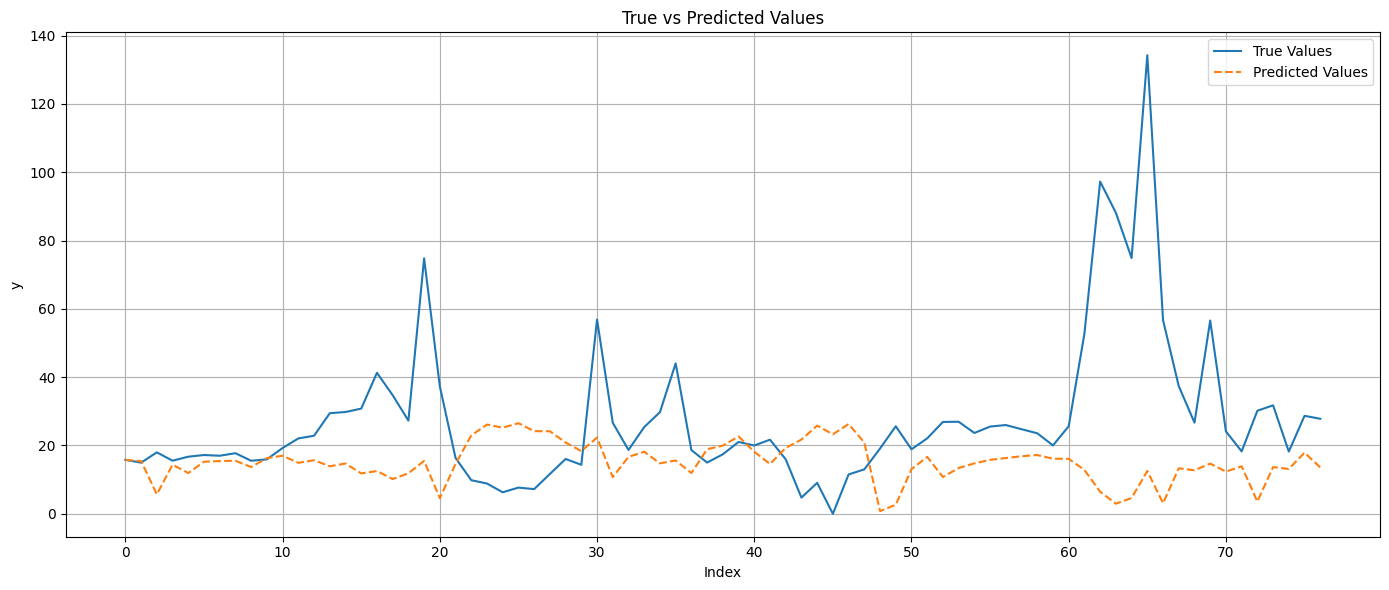

In [179]:
plt.figure(figsize=(14, 6))
   
plt.plot(range(len(ys)), ys, label='True Values')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Index')
plt.ylabel('y')
plt.legend()
plt.title('True vs Predicted Values')
plt.grid()

plt.tight_layout()
plt.show()